In [2]:
import matplotlib.pyplot as plt
import numpy as np

# import sys
# sys.path.append('../../../')
from impedance.validation import linKK
from impedance import preprocessing
from impedance.visualization import plot_nyquist, plot_residuals
# import impedance
# import impedance.validation

In [4]:
# fd_HETS = "D:/Science/Project/HETS/Code/KK/Data/EIS_ch000.csv"
# fd_Exmp = "D:/Science/Project/HETS/Code/KK/Data/exampleData.csv"
# fd_HETS = "D:/Science/Project/HETS/Code/KK/Data/NoCal.csv"
fd_RCCal = "D:/Science/Project/HETS/Code/KK/Data/RCCal/EIS_ch000.csv"
fd_RCal = "D:/Science/Project/HETS/Code/KK/Data/RCal/EIS_ch000.csv"
fd_CCal = "D:/Science/Project/HETS/Code/KK/Data/CCal/EIS_ch000.csv"
fd_NoCal = "D:/Science/Project/HETS/Code/KK/Data/NoCal/EIS_ch000.csv"

data_RCCal = np.loadtxt(fd_RCCal, delimiter=',')
data_RCal = np.loadtxt(fd_RCal, delimiter=',')
data_CCal = np.loadtxt(fd_CCal, delimiter=',')
data_NoCal = np.loadtxt(fd_NoCal, delimiter=',')


data_RCCal_RI = tuple([data_RCCal[:,0], data_RCCal[:,1]*np.exp(1j*np.pi/180*data_RCCal[:,2])])
data_RCal_RI = tuple([data_RCal[:,0], data_RCal[:,1]*np.exp(1j*np.pi/180*data_RCal[:,2])])
data_CCal_RI = tuple([data_CCal[:,0], data_CCal[:,1]*np.exp(1j*np.pi/180*data_CCal[:,2])])
data_NoCal_RI = tuple([data_NoCal[:,0], data_NoCal[:,1]*np.exp(1j*np.pi/180*data_NoCal[:,2])])

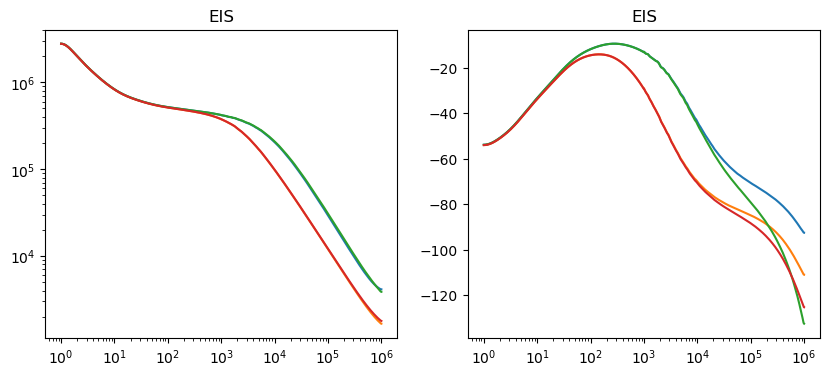

In [9]:
# Plot QI
# if Plot_FLAG:
if 1:
    fig, axis = plt.subplots(1,2, figsize=(10,4))
    axis[0].plot(data_RCCal[:,0],data_RCCal[:,1])
    axis[0].plot(data_RCal[:,0],data_RCal[:,1])
    axis[0].plot(data_CCal[:,0],data_CCal[:,1])
    axis[0].plot(data_NoCal[:,0],data_NoCal[:,1])
    axis[0].set_xscale('log')
    axis[0].set_yscale('log')
    axis[0].set_title("EIS")

    axis[1].plot(data_RCCal[:,0],data_RCCal[:,2])
    axis[1].plot(data_RCal[:,0],data_RCal[:,2])
    axis[1].plot(data_CCal[:,0],data_CCal[:,2])
    axis[1].plot(data_NoCal[:,0],data_NoCal[:,2])
    # Blue Orange Green Red
    # axis[1].set_xscale('log')
    axis[1].set_xscale('log')
    axis[1].set_title("EIS")


In [3]:
def KK_test(data_RI):
    f_poi, Z_poi = preprocessing.ignoreBelowX(data_RI[0], data_RI[1])
    M, mu, Z_linKK, res_real, res_imag = linKK(f_poi, Z_poi, c=0.5, max_M=100, fit_type='complex', add_cap=True)
    print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.4f}'.format(M, mu))
    if 1:
        fig, axis = plt.subplots(1,2, figsize=(10,4))
        axis[0].plot(f_poi,np.abs(Z_poi))
        axis[0].plot(f_poi,np.abs(Z_linKK))
        axis[0].set_xscale('log')
        axis[0].set_yscale('log')
        axis[0].set_title("EIS")

        axis[1].plot(f_poi,np.angle(Z_poi))
        axis[1].plot(f_poi,np.angle(Z_linKK))
        # axis[1].set_xscale('log')
        axis[1].set_xscale('log')
        axis[1].set_title("EIS")
    fig = plt.figure(figsize=(5,8))
    gs = fig.add_gridspec(3, 1)
    ax1 = fig.add_subplot(gs[:2,:])
    ax2 = fig.add_subplot(gs[2,:])

    # plot original data
    plot_nyquist(ax1, Z_poi, fmt='s')

    # plot measurement model
    plot_nyquist(ax1, Z_linKK, fmt='-', scale=1, units='\Omega')

    ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

    # Plot residuals
    # plot_residuals(ax2, f_HETS, res_real, res_imag, y_limits=(-3,3))
    plot_residuals(ax2, f_poi, res_real, res_imag)

    plt.tight_layout()
    plt.show()
    return Z_linKK


Completed Lin-KK Fit
M = 27
mu = 0.3460


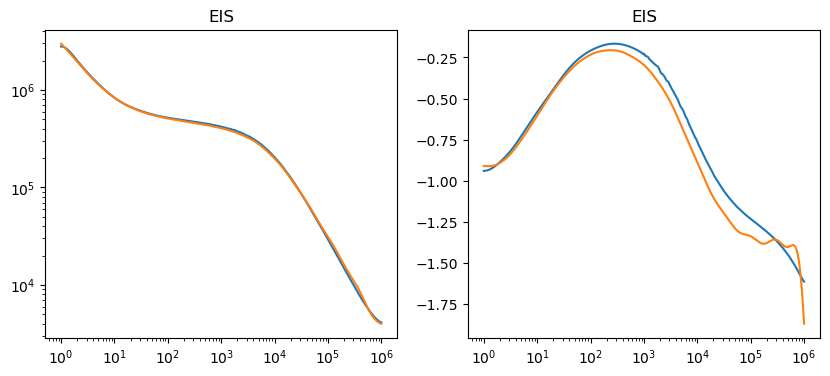

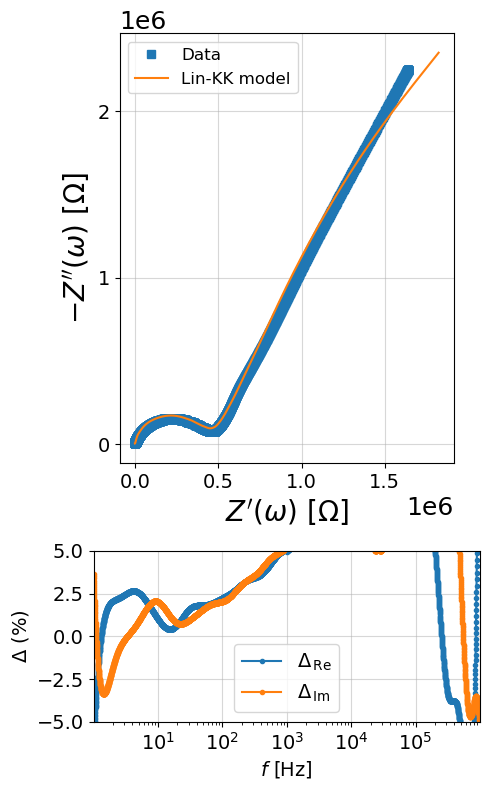

In [19]:
f_RCCal, Z_RCCal = preprocessing.ignoreBelowX(data_RCCal_RI[0], data_RCCal_RI[1])
M, mu, Z_linKK_RCCal, res_real, res_imag = linKK(f_RCCal, Z_RCCal, c=0.5, max_M=100, fit_type='complex', add_cap=True)
print('\nCompleted Lin-KK Fit\nM = {:d}\nmu = {:.4f}'.format(M, mu))
if 1:
    fig, axis = plt.subplots(1,2, figsize=(10,4))
    axis[0].plot(f_RCCal,np.abs(Z_RCCal))
    axis[0].plot(f_RCCal,np.abs(Z_linKK_RCCal))
    axis[0].set_xscale('log')
    axis[0].set_yscale('log')
    axis[0].set_title("EIS")

    axis[1].plot(f_RCCal,np.angle(Z_RCCal))
    axis[1].plot(f_RCCal,np.angle(Z_linKK_RCCal))
    # axis[1].set_xscale('log')
    axis[1].set_xscale('log')
    axis[1].set_title("EIS")
fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])

# plot original data
plot_nyquist(ax1, Z_RCCal, fmt='s')

# plot measurement model
plot_nyquist(ax1, Z_linKK_RCCal, fmt='-', scale=1, units='\Omega')

ax1.legend(['Data', 'Lin-KK model'], loc=2, fontsize=12)

# Plot residuals
# plot_residuals(ax2, f_HETS, res_real, res_imag, y_limits=(-3,3))
plot_residuals(ax2, f_RCCal, res_real, res_imag)

plt.tight_layout()
plt.show()



Completed Lin-KK Fit
M = 27
mu = 0.3460


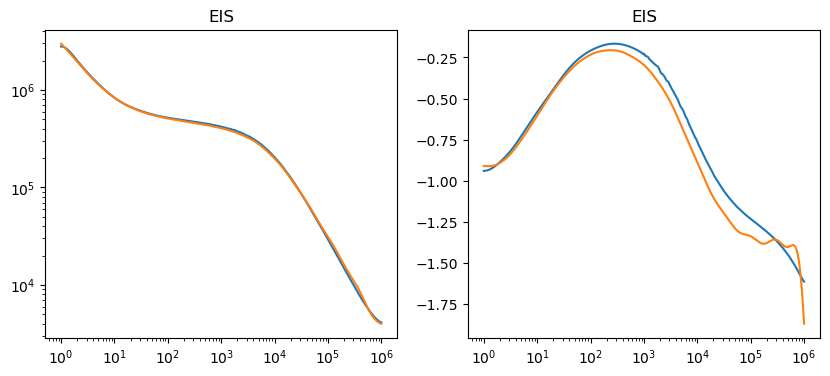

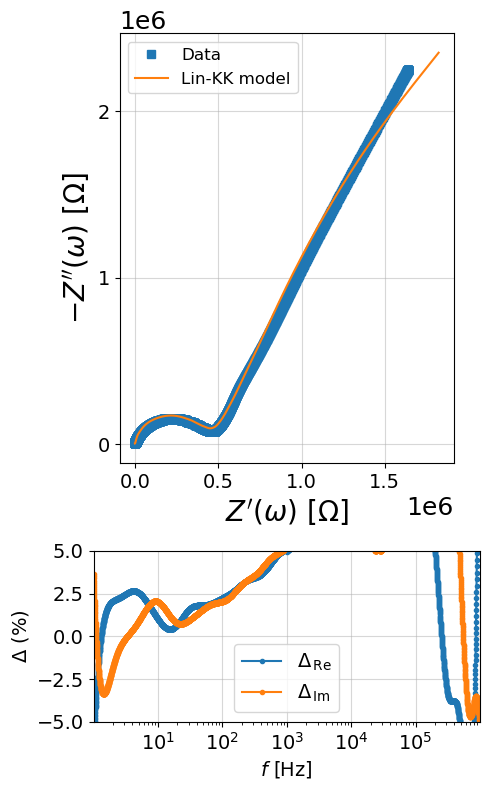

array([ 1.82392841e+06-2352231.95827146j,
        1.82102176e+06-2348599.31331407j,
        1.81811722e+06-2344969.4509779j , ...,
       -1.13949310e+03   -3852.61855452j,
       -1.16531936e+03   -3844.07961781j,
       -1.19131690e+03   -3835.4290376j ])

In [20]:
KK_test(data_RCCal_RI)



Completed Lin-KK Fit
M = 31
mu = 0.3388


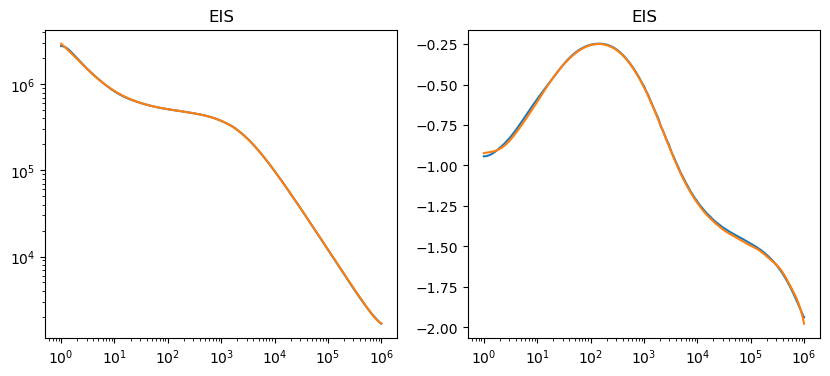

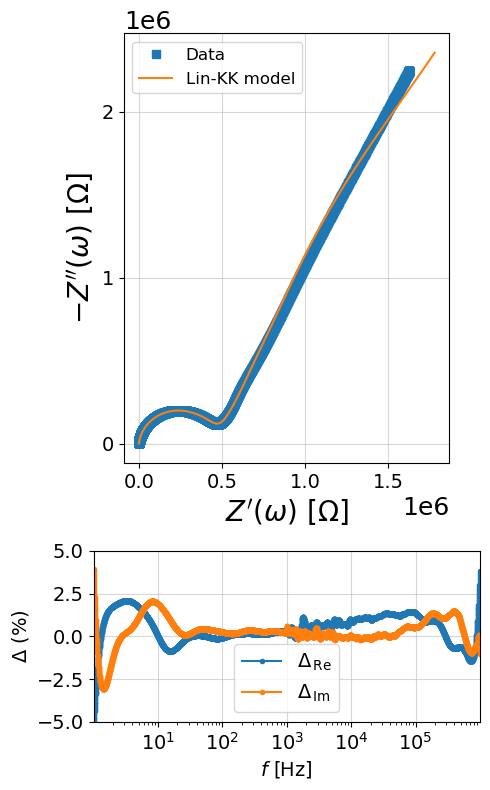

array([ 1.78124484e+06-2.35609236e+06j,  1.77871486e+06-2.35235794e+06j,
        1.77618531e+06-2.34862867e+06j, ...,
       -6.55799609e+02-1.54113024e+03j, -6.58011840e+02-1.53820268e+03j,
       -6.60240257e+02-1.53527737e+03j])

In [21]:
KK_test(data_RCal_RI)


Completed Lin-KK Fit
M = 27
mu = 0.4432


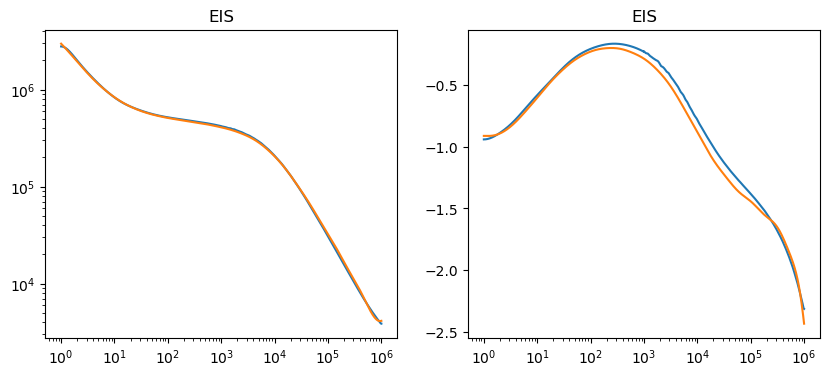

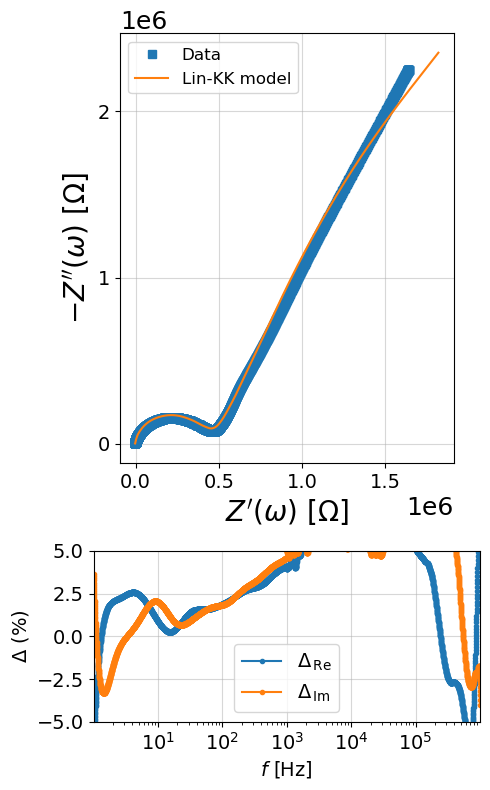

array([1820391.554863  -2352598.60108133j,
       1817531.14985542-2348959.48407638j,
       1814672.58245429-2345323.42706274j, ...,
         -3112.34432705   -2721.62264323j,
         -3126.49905878   -2708.71675796j,
         -3140.74130403   -2695.7554725j ])

In [22]:
KK_test(data_CCal_RI)


Completed Lin-KK Fit
M = 31
mu = 0.4214


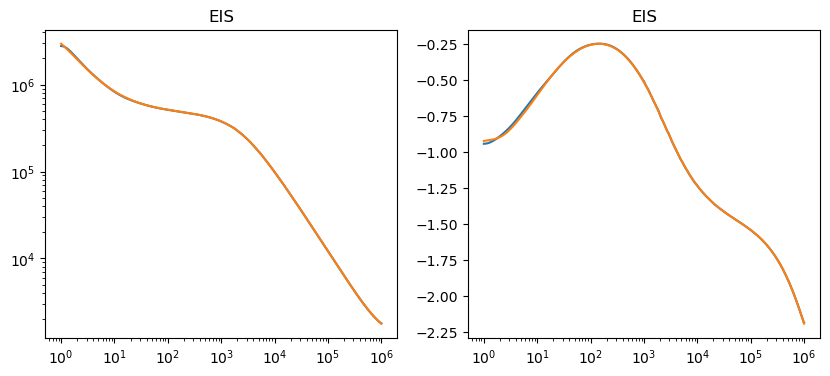

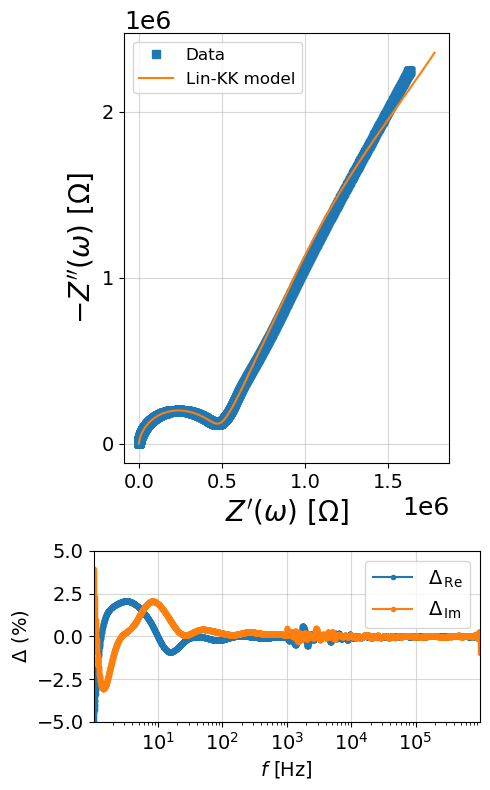

array([ 1.78008573e+06-2.35591656e+06j,  1.77757368e+06-2.35218404e+06j,
        1.77506192e+06-2.34845675e+06j, ...,
       -1.03627254e+03-1.45043337e+03j, -1.03686457e+03-1.44693280e+03j,
       -1.03745696e+03-1.44344067e+03j])

In [23]:
KK_test(data_NoCal_RI)

In [63]:
def EIS_recal(data_RC):
    f_poi = data_RC[:,0]
    Z_poi = data_RC[:,1] * np.exp(1j*np.deg2rad(data_RC[:,2]))
    Y_poi = 1/Z_poi

    Rg0 = 1.611e13
    Cp0 = 1.4e-9
    
    _Rg0_rescale = 1/Rg0*np.power(f_poi,1.583)
    _Cp0_rescale = Cp0*np.power(f_poi,0.911)
    Y_org = Y_poi - _Rg0_rescale + 1j*_Cp0_rescale
    # Y_org = Y_poi - _Rg0_rescale 
    # Y_org = Y_poi + 1j*_Cp0_rescale
    # Y_org = Y_poi
    Z_org = 1/Y_org
    return np.transpose(np.array([f_poi, np.abs(Z_org), np.rad2deg(np.angle(Z_org))]))


In [64]:
# Restore NoCal from RC Cal
data_recal = EIS_recal(data_RCCal)

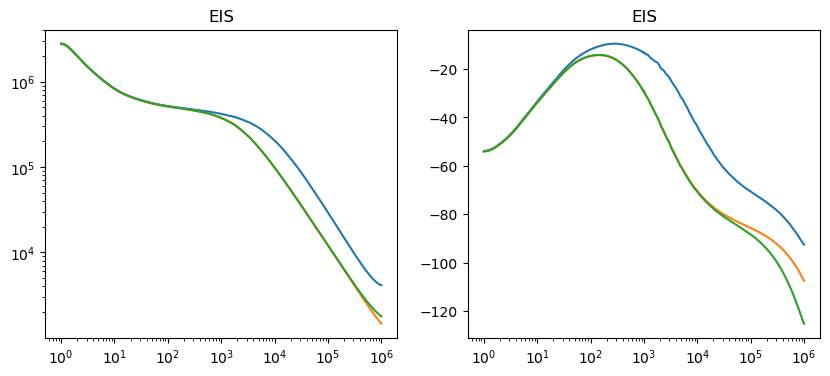

In [65]:
if 1:
    fig, axis = plt.subplots(1,2, figsize=(10,4))
    axis[0].plot(data_RCCal[:,0],data_RCCal[:,1])
    axis[0].plot(data_recal[:,0],data_recal[:,1])
    axis[0].plot(data_NoCal[:,0],data_NoCal[:,1])
    axis[0].set_xscale('log')
    axis[0].set_yscale('log')
    axis[0].set_title("EIS")

    axis[1].plot(data_RCCal[:,0],data_RCCal[:,2])
    axis[1].plot(data_recal[:,0],data_recal[:,2])
    axis[1].plot(data_NoCal[:,0],data_NoCal[:,2])
    # Blue Orange Green Red
    # axis[1].set_xscale('log')
    axis[1].set_xscale('log')
    axis[1].set_title("EIS")


Completed Lin-KK Fit
M = 31
mu = 0.4004


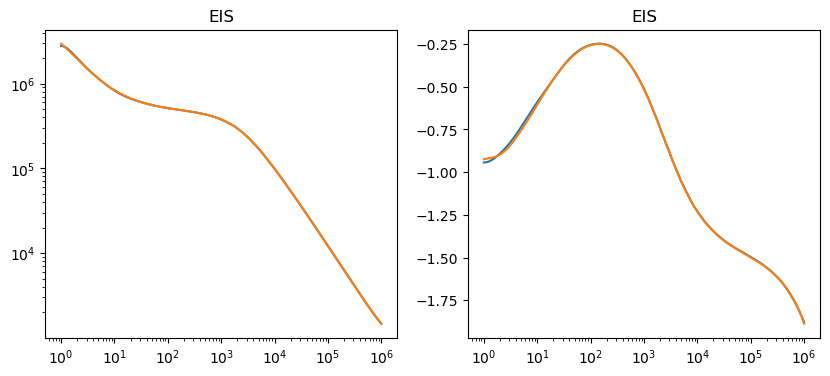

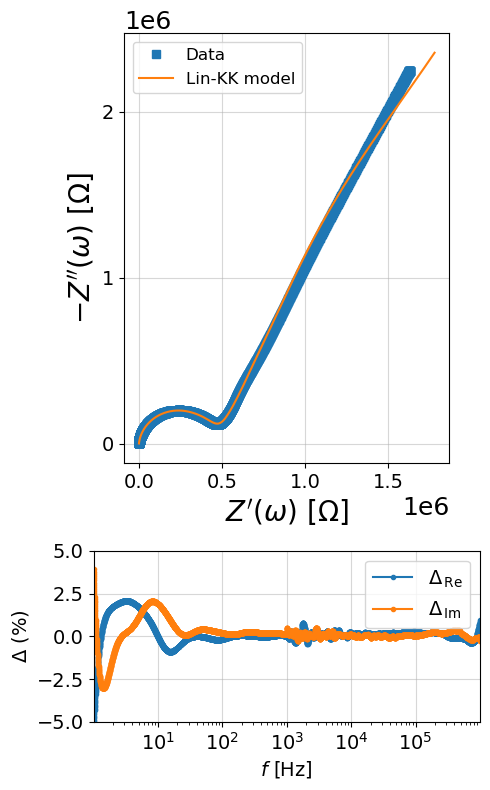

array([ 1.78089368e+06-2.35631048e+06j,  1.77837052e+06-2.35257695e+06j,
        1.77584772e+06-2.34884860e+06j, ...,
       -4.54312786e+02-1.40008211e+03j, -4.55045899e+02-1.39669940e+03j,
       -4.55782478e+02-1.39332439e+03j])

In [67]:
data_recal_RI = tuple([data_recal[:,0], data_recal[:,1]*np.exp(1j*np.pi/180*data_recal[:,2])])
KK_test(data_recal_RI)

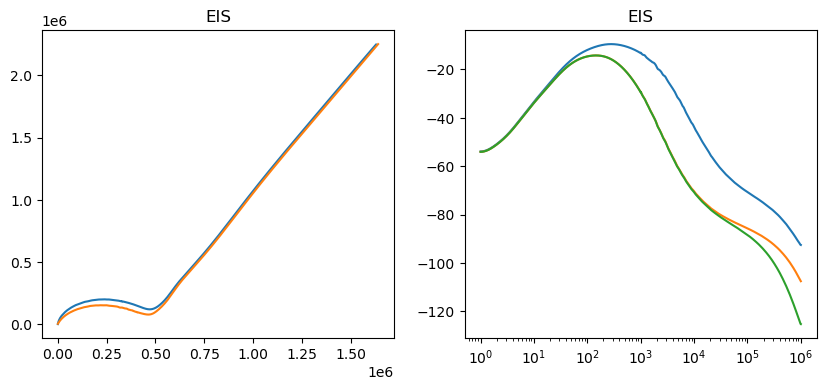

In [72]:
if 1:
    fig, axis = plt.subplots(1,2, figsize=(10,4))
    axis[0].plot(np.real(data_recal_RI[1]),-np.imag(data_recal_RI[1]))
    axis[0].plot(np.real(data_RCCal_RI[1]),-np.imag(data_RCCal_RI[1]))
    # axis[0].plot(data_recal[:,0],data_recal[:,1])
    # axis[0].plot(data_NoCal[:,0],data_NoCal[:,1])
    # axis[0].set_xscale('log')
    # axis[0].set_yscale('log')
    axis[0].set_title("EIS")

    axis[1].plot(data_RCCal[:,0],data_RCCal[:,2])
    axis[1].plot(data_recal[:,0],data_recal[:,2])
    axis[1].plot(data_NoCal[:,0],data_NoCal[:,2])
    # Blue Orange Green Red
    # axis[1].set_xscale('log')
    axis[1].set_xscale('log')
    axis[1].set_title("EIS")

In [ ]:
# fd_open = "D:/Science/Project/HETS/Code/KK/Data/OpenInVivo.csv"
fd_open = "D:/Science/Project/HETS/Code/KK/Data/OddOpenCircuit.csv"


data_Open = np.loadtxt(fd_open, delimiter=',')
data_Open_RI = tuple([data_Open[:,0], data_Open[:,1]*np.exp(1j*np.pi/180*data_Open[:,2])])
data_Open_re = EIS_recal(data_Open)
data_Open_re_RI = tuple([data_Open_re[:,0], data_Open_re[:,1]*np.exp(1j*np.pi/180*data_Open_re[:,2])])

NameError: name 'np' is not defined


Completed Lin-KK Fit
M = 8
mu = 0.1783


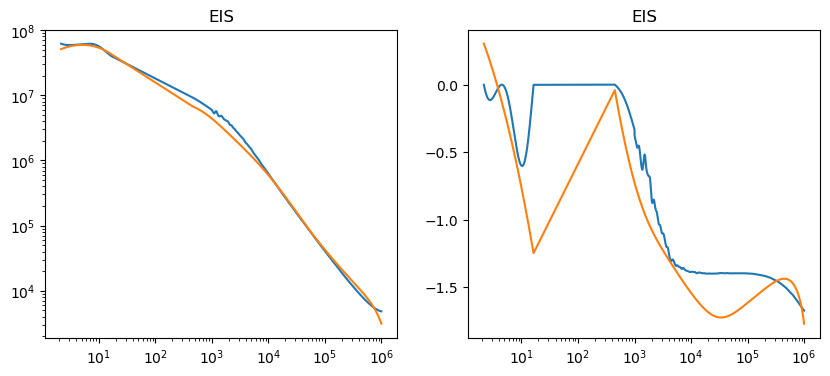

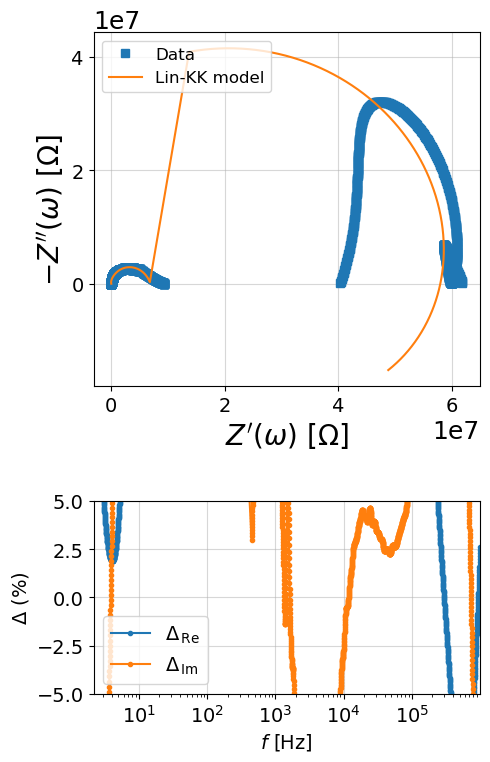

array([ 4.87649281e+07+1.52019045e+07j,  4.88291858e+07+1.51505492e+07j,
        4.88933602e+07+1.50989036e+07j, ...,
       -5.97570047e+02-3.11011267e+03j, -6.06072546e+02-3.08699526e+03j,
       -6.14576529e+02-3.06385311e+03j])

In [ ]:
KK_test(data_Open_RI)


Completed Lin-KK Fit
M = 13
mu = 0.4518


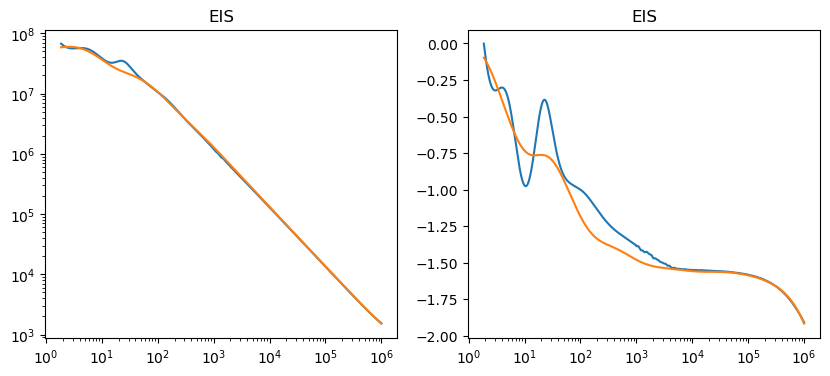

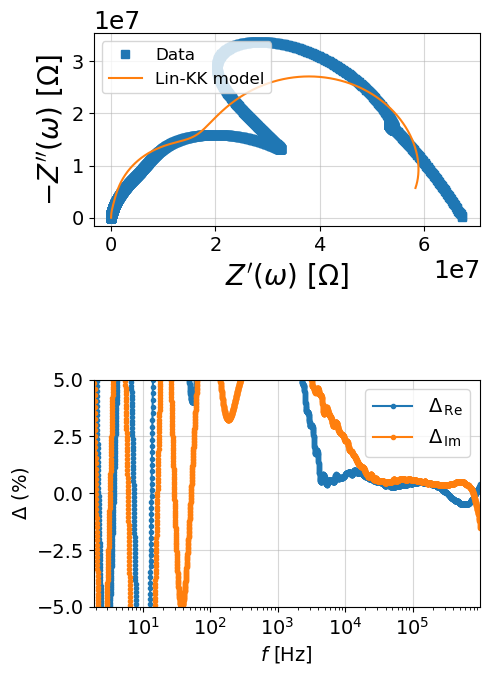

array([ 5.83368389e+07-5.69553447e+06j,  5.83520831e+07-5.73940274e+06j,
        5.83671585e+07-5.78348795e+06j, ...,
       -5.13777964e+02-1.43239784e+03j, -5.14108179e+02-1.42848518e+03j,
       -5.14438328e+02-1.42458166e+03j])

In [76]:
KK_test(data_Open_re_RI)